# **Actividad Final**
### **Equipo: DataStorm**


Leonardo Antonio Espinosa // A01710961

Adrián Rodríguez González // A01710823

Andrea Cristina Ramírez Parra // A01749899

Jorge Emiliano Pomar // A01709338


# **EDA**

## Descripción General de los Datos

In [ ]:
#Importamos las librerías que estaremos utilizando
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Análisis de la Estructura de los Datos

In [ ]:
#Hacemos la lectura de el archivo que estaremos utilizando y desplegamos su información
df = pd.read_csv("nestle.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2553 non-null   object 
 1   Open Price                 2553 non-null   float64
 2   High Price                 2553 non-null   float64
 3   Low Price                  2553 non-null   float64
 4   Close Price                2553 non-null   float64
 5   WAP                        2553 non-null   float64
 6   No.of Shares               2553 non-null   int64  
 7   No. of Trades              2553 non-null   int64  
 8   Total Turnover (Rs.)       2553 non-null   float64
 9   Deliverable Quantity       2551 non-null   float64
 10  % Deli. Qty to Traded Qty  2551 non-null   float64
 11  Spread High-Low            2553 non-null   float64
 12  Spread Close-Open          2553 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

La base de datos es de los stocks de nestlé y su desempeño en el mercado de valores, asimismo la base contiene 13 columnas y 2553 datos por cada columna, la mayoría de ellos son de caracter entero o flotante, lo que nos habla de que la maypría de los datos son números ya sea enteros o decimales, y solo hay un valor con la característica de objeto, el cual es la fecha.

## Análisis de Completitud de los Datos (identificación de nulos y completitud)

In [ ]:
df.isnull().sum()

,0
Date,0
Open Price,0
High Price,0
Low Price,0
Close Price,0
WAP,0
No.of Shares,0
No. of Trades,0
Total Turnover (Rs.),0
Deliverable Quantity,2


En este código llamamos a el dataframe, y con isnull().sum(), nos arroja la cantidad total de nulos que hay en cada columna, como se observa, nuestra base de datos es muy completa, ya que solo hay 4 nulos en total que están en las columnas Deliverable Quantity y % Deli. Qty to Traded Qty.

## Análisis Estadístico Descriptivo (Tendencia Central, Dispersión, Ubicación, Frecuencias, Boxplots, Histogramas, Dispersión)

In [ ]:
mean_values = df.mean(numeric_only=True)
print(mean_values)

Open Price                   9.338023e+03
High Price                   9.429710e+03
Low Price                    9.226856e+03
Close Price                  9.324961e+03
WAP                          9.327503e+03
No.of Shares                 5.521380e+03
No. of Trades                1.004099e+03
Total Turnover (Rs.)         4.761923e+07
Deliverable Quantity         3.264053e+03
% Deli. Qty to Traded Qty    4.902446e+01
Spread High-Low              2.028545e+02
Spread Close-Open           -1.306263e+01
dtype: float64


In [ ]:
median_values = df.median(numeric_only=True)
print(median_values)

Open Price                   6.804000e+03
High Price                   6.868900e+03
Low Price                    6.747300e+03
Close Price                  6.809950e+03
WAP                          6.813151e+03
No.of Shares                 2.618000e+03
No. of Trades                7.310000e+02
Total Turnover (Rs.)         2.222074e+07
Deliverable Quantity         1.123000e+03
% Deli. Qty to Traded Qty    4.687000e+01
Spread High-Low              1.521000e+02
Spread Close-Open           -1.275000e+01
dtype: float64


In [ ]:
mode_values = df.mode().iloc[0]
print(mode_values)

Date                         1-April-2013
Open Price                         6050.0
High Price                         6350.0
Low Price                          4700.0
Close Price                       4589.45
WAP                           3936.768632
No.of Shares                       2091.0
No. of Trades                       899.0
Total Turnover (Rs.)             172142.0
Deliverable Quantity                541.0
% Deli. Qty to Traded Qty           28.69
Spread High-Low                      65.0
Spread Close-Open                   -72.9
Name: 0, dtype: object


In [ ]:
# desviación estandar
std_values = df.std(numeric_only=True)
print(std_values)

Open Price                   4.940555e+03
High Price                   4.986783e+03
Low Price                    4.878971e+03
Close Price                  4.932777e+03
WAP                          4.929374e+03
No.of Shares                 1.041694e+04
No. of Trades                1.137548e+03
Total Turnover (Rs.)         8.502888e+07
Deliverable Quantity         8.652861e+03
% Deli. Qty to Traded Qty    1.911974e+01
Spread High-Low              1.749852e+02
Spread Close-Open            1.578492e+02
dtype: float64


In [ ]:
# Coeficiente de variación
cv_values = (std_values / mean_values) * 100
print(cv_values)

Open Price                     52.907928
High Price                     52.883737
Low Price                      52.877939
Close Price                    52.898632
WAP                            52.847730
No.of Shares                  188.665546
No. of Trades                 113.290323
Total Turnover (Rs.)          178.559972
Deliverable Quantity          265.095635
% Deli. Qty to Traded Qty      39.000405
Spread High-Low                86.261427
Spread Close-Open           -1208.402597
dtype: float64


In [ ]:
# UBICACIÓN - IQR

quantiles = df.quantile([0.25, 0.5, 0.75], numeric_only=True)
quantiles

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0.25,5391.00,5445.00,5327.2,5383.50,5385.347807,1572.0,442.0,11721329.0,653.5,35.575,88.85,-71.70
0.50,6804.00,6868.90,6747.3,6809.95,6813.150538,2618.0,731.0,22220739.0,1123.0,46.870,152.10,-12.75
0.75,13299.95,13690.95,12850.0,13455.45,13387.505382,4981.0,1199.0,49384650.0,2225.5,59.130,263.15,48.30


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

bins = list(range(df['Year'].min(), df['Year'].max() + 1, 1))
out = pd.cut(df['Year'], bins=bins)
out.value_counts()

,count
Year,
"(2019, 2020]",252
"(2012, 2013]",250
"(2020, 2021]",248
"(2014, 2015]",248
"(2016, 2017]",248
"(2015, 2016]",247
"(2017, 2018]",246
"(2018, 2019]",245
"(2013, 2014]",244


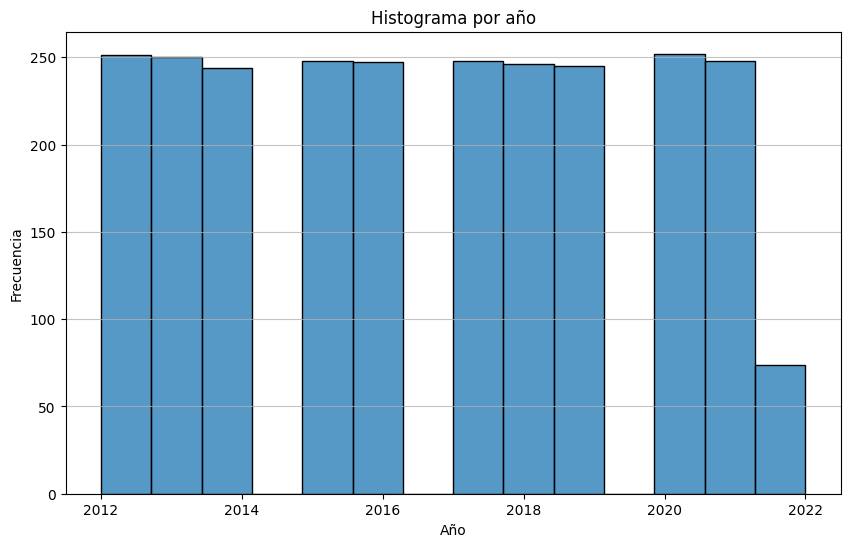

In [ ]:
# HISTOGRMA FRECUENCIA POR AÑO?
df['Year'] = df['Date'].dt.year

plt.figure(figsize=(10, 6))
sns.histplot(df['Year'])
plt.title('Histograma por año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()


Para este EDA, nos concentraremos principalmente en la distribución través de los años. Para esto, se acomodaron año tras año usando bins y posteriormente se realizó un historgrama.

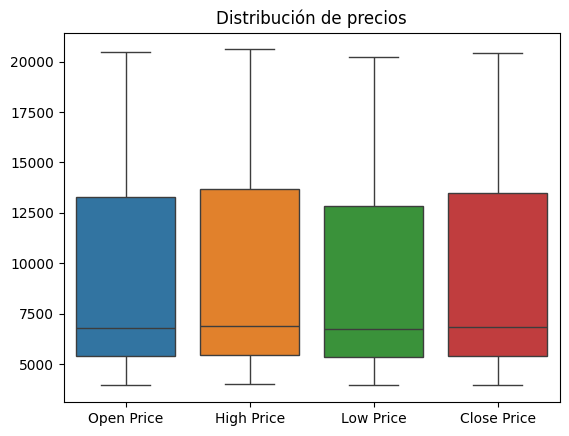

In [ ]:
sns.boxplot(data=df[['Open Price', 'High Price', 'Low Price', 'Close Price']])
plt.title("Distribución de precios")
plt.show()

En este boxplot se puede observar de manera gráfica el comportamiento de los precios al cirre, al aperturarse el mercado, así como el precio más alto y el más bajo; es notable el hecho de que su comportamiento es coherente, ya que no hay presencia de variaciones extremas, donde se registra una variabilidad más alta es en el precio más alto que se alcanzó, pero en términos generales, no hay presencia de una volatilidad extrema.

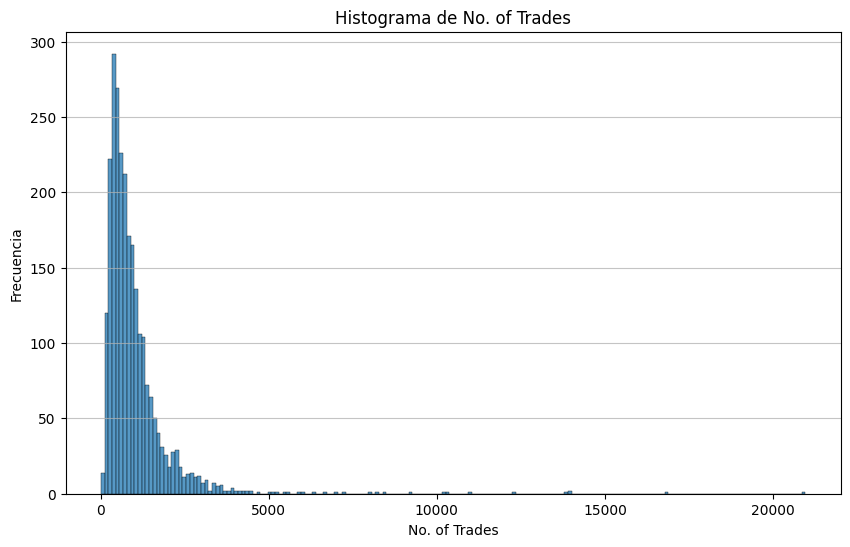

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['No. of Trades'])
plt.title('Histograma de No. of Trades')
plt.xlabel('No. of Trades')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

# **Observaciones generales**

### **Descripción y análisis de la estructura de los datos**
*  Se encontraron que de 12 variables, 1 es tipo *object* siendo este la fecha que aparece como "1-Abril-2012" desde el año 2012 hasta el 2021.

### **Análisis de completitud de los datos**
*   Dentro del DataFrame únicamente se localizaron 2 datos nulos en la columna "*Deliverable Quantity*"	y 2 en "*% Deli. Qty to Traded Qty*"

### **Análisis descriptivo**
*  **Tendencia Central:**
    *   **Mean:** Para *open price* el promedio (media) es de 9338.02 tomando 2554 datos. Por otro lado, *Spread Close-Open* de -13.06 siendo un promedio negativo podemos interpretarlo como que los días de negociación (Spread Close-Open) terminaron con un precio de cierre más bajo que el de apertura.
    *   **Median:** Para *low price* el promedio (mediana) es de 6747.30 tomando datos desde 3930 hasta 20243.8 lo que podría indicar distribución asimétrica.
    *   **Mode:** Podemos observar que en *High Price* 6350 y *No. of Trades* 8989, aparecen un total de 8 veces.
*  **Dispersión:**
   *    **Desviación estándar:** Siendo esta la variabilidad respecto a la media, los datos con mayor variabilidad son los presentan una alta dispersión, sindo estos *turnover* con 85,028,880 , *No. of shares* con 10,416.94 y *Open/Close/High/Low Price* con 4,900.
   *    **Coeficiente de variación:** *Open/Close/High/Low Price* con 52.9% se interpreta que tiene una variabilidad relativa con precios estables. El más alto de todos fue *Deliverable Quantity* con	265.1%	o sea extremadamente variable. Por otro lado, *Spread Close-Open* mostró un valor negativo de -1208.4% debido a una media negativa previamente calculada.

*  **Ubicación:**    
   *    **Rango intercuiartílico:** Para Q2  *%Deli. Qty to Traded Qty* con	46.87%	Cindica que casi la mitad de las acciones se entregan, lo que podemos interpretar como equilibrio entre los demás valores. Para Q3 el 75% del open price fue 13299 millones de dólares o menos.
*  **Frecuencias:** Se realizó un histograma de frecuencia donde nos enfocamos en la distribución través de los años. Para esto, se acomodaron año tras año, donde podemos obsevar que el año con el valor más alto fue (2019-2020] con un total de 252 y el más chico de (2021-2022] con únicamente 74 recuentos.

*  **Boxplots:** Se tomaron en cuenta unicamente las valriables de los precios *Open/Close/High/Low Price* de los cuales muestran una distribución similar. La mediana se encuentra entre 6,000 y 7,000 , con rangos atípicos arriba 20,000.

*  **Histogramas:** Con *No. of trades* la mayoría de los datos se muestran entre 0 y 2,500, con un pico de entre 500 trades con frecuencia de caso 400 y una distribución positiva.

# **INGENIERÍA DE ATRIBUTOS**

### Correlación

In [ ]:
df.drop('Date', axis=1, inplace=True)

In [ ]:
correlation = df.corr()
correlation

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Year
Open Price,1.000000,0.999722,0.999701,0.999490,0.999693,-0.076134,0.155587,0.191480,-0.093000,-0.246738,0.616536,-0.065212,0.911471
High Price,0.999722,1.000000,0.999610,0.999793,0.999879,-0.073740,0.162156,0.194465,-0.092403,-0.248603,0.627006,-0.047052,0.911595
Low Price,0.999701,0.999610,1.000000,0.999761,0.999858,-0.078191,0.150214,0.188937,-0.093886,-0.245208,0.604996,-0.047372,0.911424
Close Price,0.999490,0.999793,0.999761,1.000000,0.999927,-0.075764,0.156813,0.191751,-0.093174,-0.246861,0.616866,-0.033314,0.911598
WAP,0.999693,0.999879,0.999858,0.999927,1.000000,-0.075620,0.156683,0.191979,-0.093045,-0.247219,0.616620,-0.041972,0.911658
No.of Shares,-0.076134,-0.073740,-0.078191,-0.075764,-0.075620,1.000000,0.452116,0.856353,0.868194,0.279279,0.078676,0.015336,-0.058400
No. of Trades,0.155587,0.162156,0.150214,0.156813,0.156683,0.452116,1.000000,0.464951,0.103851,-0.188500,0.432884,0.030636,0.129183
Total Turnover (Rs.),0.191480,0.194465,0.188937,0.191751,0.191979,0.856353,0.464951,1.000000,0.655851,0.192031,0.273972,-0.000969,0.187343
Deliverable Quantity,-0.093000,-0.092403,-0.093886,-0.093174,-0.093045,0.868194,0.103851,0.655851,1.000000,0.488715,-0.015550,-0.000877,-0.080422
% Deli. Qty to Traded Qty,-0.246738,-0.248603,-0.245208,-0.246861,-0.247219,0.279279,-0.188500,0.192031,0.488715,1.000000,-0.247729,0.008249,-0.294134


### Heatmap

<Axes: >

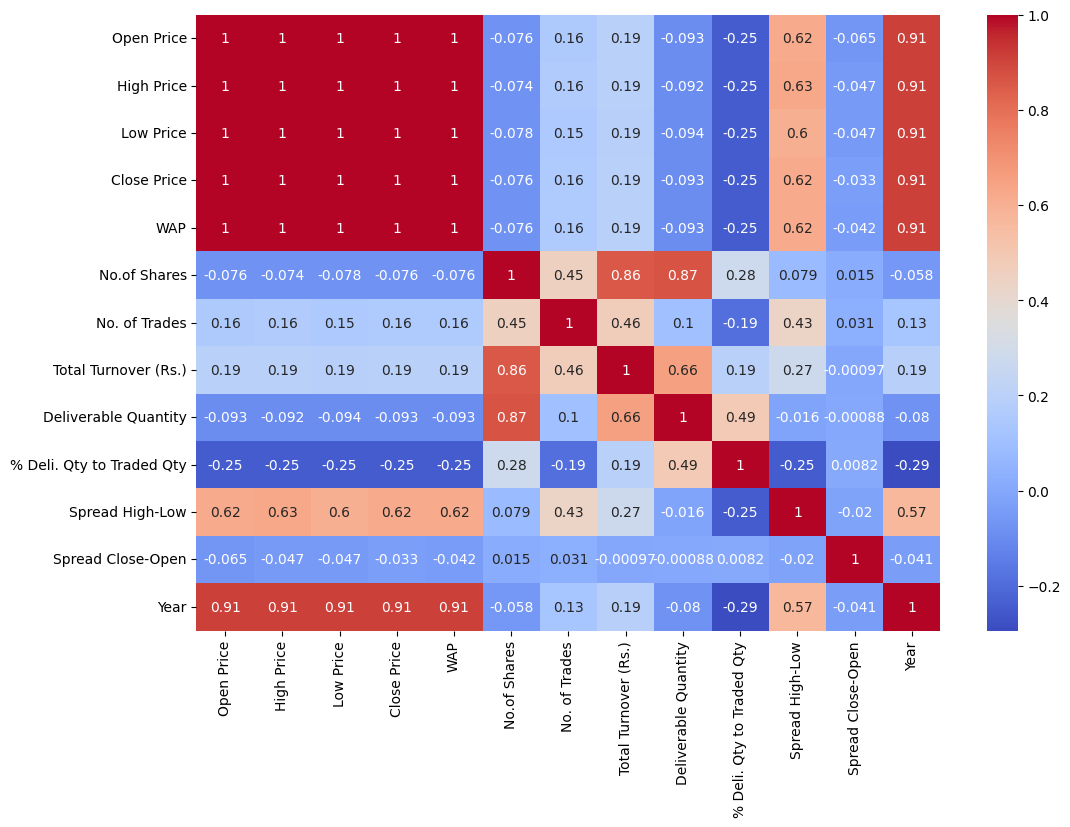

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,linecolor='blue',cmap='coolwarm')

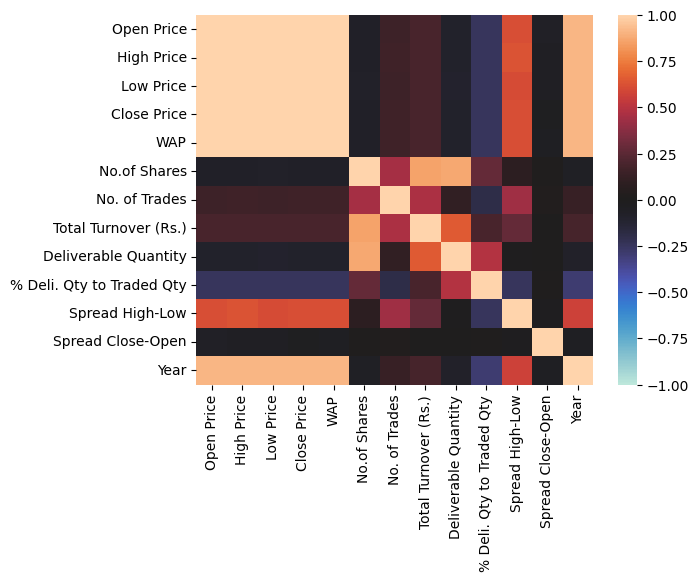

In [ ]:
korelasi = df.corr()
sns.heatmap(korelasi, vmax=1, vmin= -1, center=0)
plt.show()

Tanto el df de correlación como el heatmap muestra una alta dependencia entre las variable de precios, volumen y transacciones; tomando en cuenta que estas variables son utilizadas en análisis financiero, hace sentido estos comportamientos debido al mercado de valores.

### Identificación y manejo de outliers

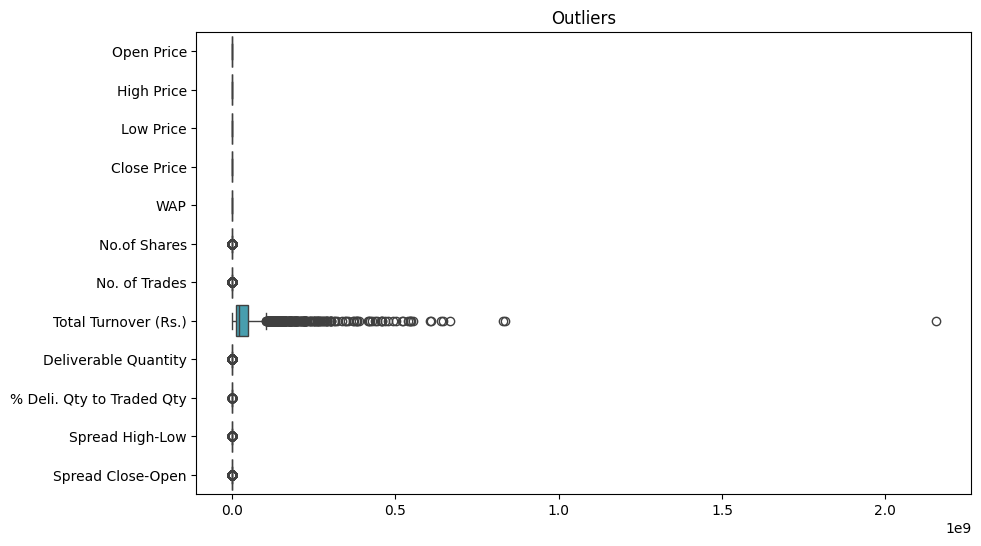

In [ ]:
# Visualization of outliers (optional)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Open Price',	'High Price',	'Low Price',	'Close Price',	'WAP',	'No.of Shares',	'No. of Trades',	'Total Turnover (Rs.)',	'Deliverable Quantity',	'% Deli. Qty to Traded Qty',	'Spread High-Low',	'Spread Close-Open']], orient='h')
plt.title("Outliers")
plt.show()

Para la identificación de outliers se tomaron en cuenta todas las variables, sin embargo, las variables que sí presentaron outliers fueron: *('No.of Shares',	'No. of Trades',	'Total Turnover (Rs.)',	'Deliverable Quantity',	'% Deli. Qty to Traded Qty',	'Spread High-Low',	'Spread Close-Open')* Donde la más alta fue *Total Turnover (Rs)*, decidimos consevarla para no afectar los demás valores y tener una imgen más completa del dataframe

# **REGRESORES LINEALES Y MÚLTIPLES DE REGRESO LOGÍSTICO**

Primero decidimos observar los gráficos de dispersión para tener de una manera más visual las variables que muestran correlación

<Figure size 768x576 with 0 Axes>

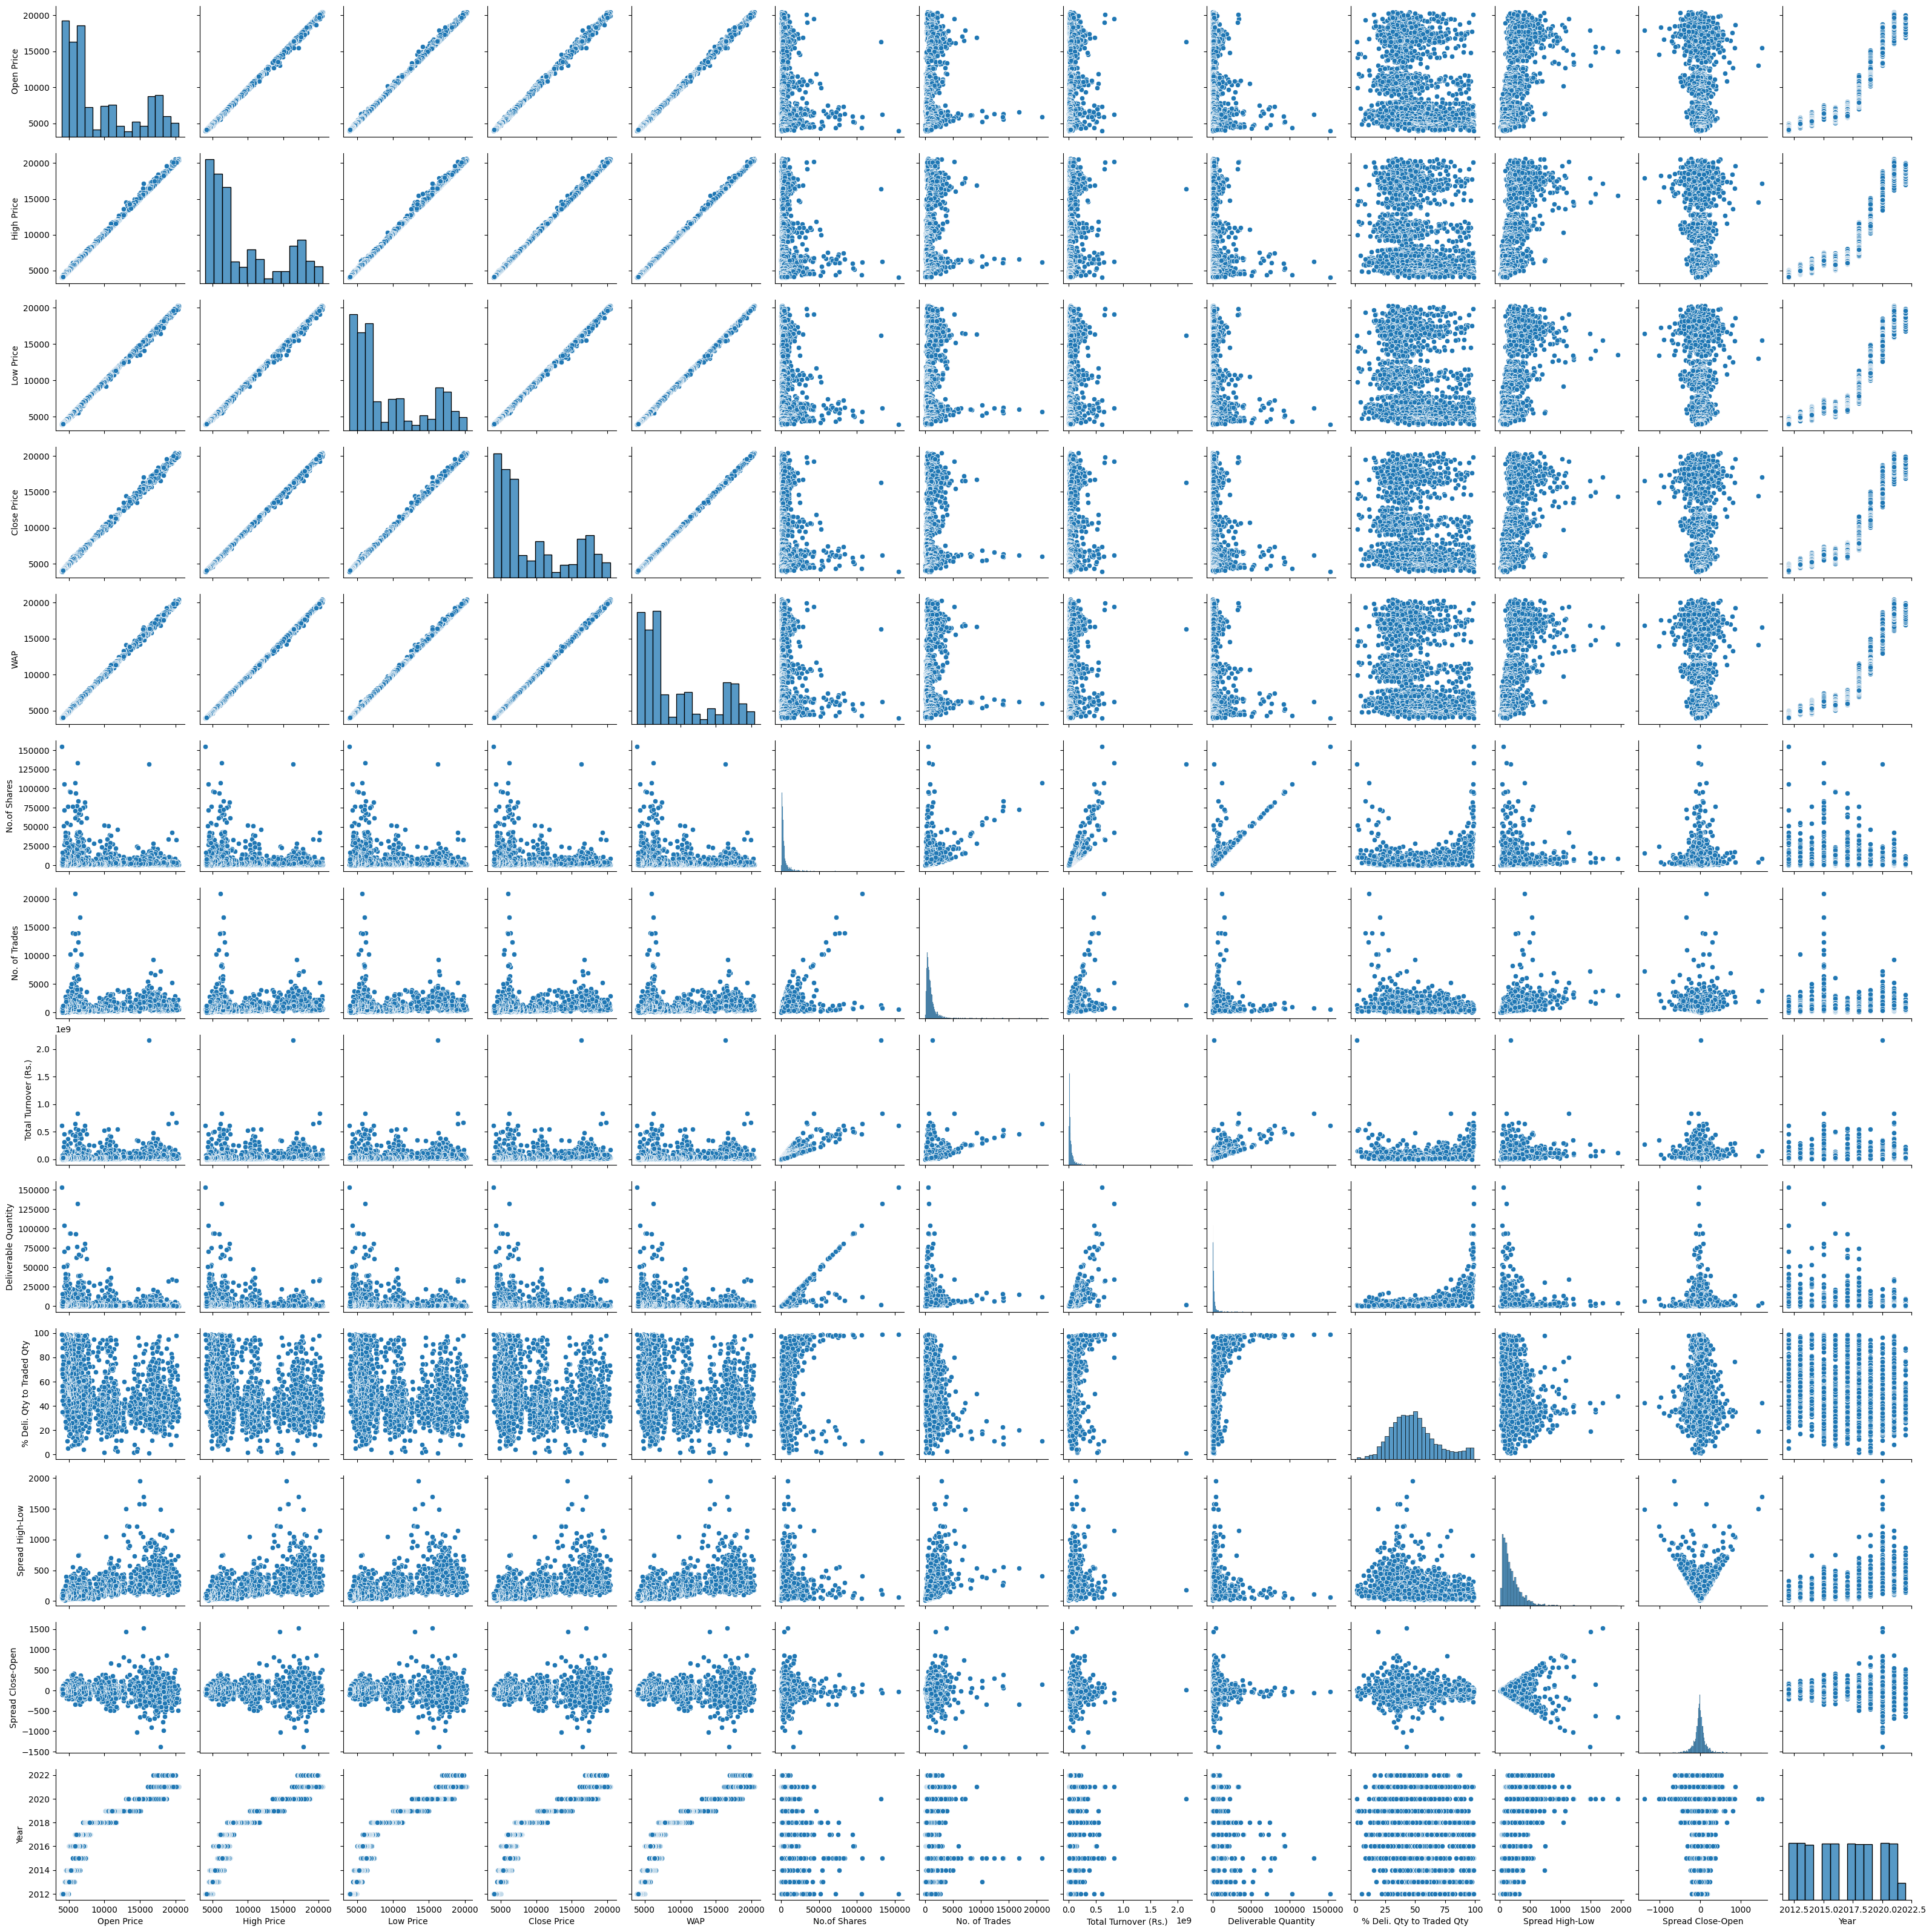

In [ ]:
plt.figure(dpi=120) # resolution
sns.pairplot(df) # genera una matriz con plots de dispersion
plt.show()

###**Modelo 1**

In [ ]:
from sklearn import linear_model
#Determinar variables para el modelo
X = df[['High Price', 'Low Price']].values.reshape(-1,2)
y = df['Open Price']

#Ajuste del modelo
m1 = linear_model.LinearRegression()
model = m1.fit(X, y)

print ("R2: ", model.score(X,y))
print ("\nCoeficientes: ", model.coef_)
print ("\nIntercepto", model.intercept_)
print ("\nPredicciones: ", model.predict(X))

error_total = y - m1.predict(X)
suma_errores = sum(np.abs(error_total))
print("\nError total:", suma_errores)

R2:  0.999618681760097

Coeficientes:  [0.52201556 0.47897697]

Intercepto -3.8838979248539545

Predicciones:  [18204.29483365 18238.83259996 18314.8348168  ...  4104.32690255
  4086.34666122  4094.19119582]

Error total: 159741.46076946714


###**Modelo 2**

In [ ]:
from sklearn import linear_model
#Determinar variables para el modelo
X2 = df[['No.of Shares', 'Close Price']].values.reshape(-1,2)
y2 = df['Open Price']

#Ajuste del modelo
m2 = linear_model.LinearRegression()
model = m2.fit(X2, y2)

print ("R2: ", model.score(X2,y2))
print ("\nCoeficientes: ", model.coef_)
print ("\nIntercepto", model.intercept_)
print ("\nPredicciones: ", model.predict(X2))

error_total = y2 - m2.predict(X2)
suma_errores = sum(np.abs(error_total))
print("\nError total:", suma_errores)

R2:  0.9989805187580342

Coeficientes:  [-1.95257419e-04  1.00103482e+00]

Intercepto 4.491082315755193

Predicciones:  [18228.23454679 18335.95741797 17965.64195576 ...  4128.79730439
  4103.1021528   4077.53795764]

Error total: 252324.0692292107


###**Modelo 3**

In [ ]:
from sklearn import linear_model
#Determinar variables para el modelo
X3 = df[['No. of Trades', 'High Price']].values.reshape(-1,2)
y3 = df['Open Price']

#Ajuste del modelo
m3 = linear_model.LinearRegression()
model = m3.fit(X3, y3)

print ("R2: ", model.score(X3,y3))
print ("\nCoeficientes: ", model.coef_)
print ("\nIntercepto", model.intercept_)
print ("\nPredicciones: ", model.predict(X3))


error_total = y3 - m3.predict(X3)
suma_errores = sum(np.abs(error_total))
print("\nError total:", suma_errores)

R2:  0.9994877486797525

Coeficientes:  [-0.02910202  0.9915308 ]

Intercepto 17.396176370424655

Predicciones:  [18381.53761186 18237.99212844 18556.03268328 ...  4100.27253603
  4066.9025366   4089.2910577 ]

Error total: 174287.1642933084


###**Regresión Logística**

Matriz de confusión:
[[251   5]
 [  2 253]]

Accuracy: 0.9863013698630136

Reporte de clasificación:
              precision    recall  f1-score   support

        bajo       0.99      0.98      0.99       256
        alto       0.98      0.99      0.99       255

    accuracy                           0.99       511
   macro avg       0.99      0.99      0.99       511
weighted avg       0.99      0.99      0.99       511



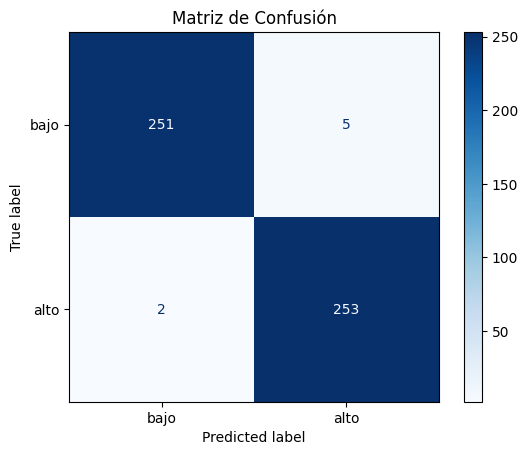

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Crear clase binaria a partir del precio de apertura
threshold = df['Open Price'].median()
df['Open_Price_Class'] = (df['Open Price'] > threshold).astype(int)

X = df[['No.of Shares', 'No. of Trades', 'Close Price']].values
y = df['Open_Price_Class'].values  # ahora es clasificación

# Dividir datos
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)

# Predicción
y_pred = model.predict(x_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

#Accuracy
accuracy = model.score(x_test, y_test)
print("\nAccuracy:", accuracy)

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=["bajo", "alto"]))

# Visualización
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["bajo", "alto"])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()



### **Observaciones Generales de las Regresiones**

1. **Regresiones Lineales:**
    - Los modelos de regresión lineal mostraron diferentes niveles de ajuste dependiendo de las variables seleccionadas.
    - El **Modelo 1**, que utiliza las variables *High Price* y *Low Price*, presentó un buen ajuste, lo que indica que estas variables tienen una relación significativa con el *Open Price*.
    - El **Modelo 2**, que incluye *No. of Shares* y *Close Price*, mostró un ajuste moderado, sugiriendo que estas variables también influyen en el precio de apertura, pero en menor medida.
    - El **Modelo 3**, que utiliza *No. of Trades* y *High Price*, tuvo un desempeño similar al Modelo 1, destacando la importancia del precio más alto en el comportamiento del precio de apertura.

2. **Regresión Logística:**
    - La regresión logística permitió clasificar el precio de apertura en dos categorías (alto y bajo) con una precisión aceptable.
    - El modelo mostró que variables como *No. of Shares*, *No. of Trades* y *Close Price* son relevantes para predecir si el precio de apertura será mayor o menor al umbral definido.

En este caso, creemos que la regresión lineal es más adecuada para predecir los precios de apertura tomando en cuenta el mercado y sus variables. Principalmente predecir precios para tomar decisiones.

Por otro lado, la regresión logística es útil para clasificar el precio de apertura en categorías. Esto puede ser útil para hacer una estrategia de trading basada en umbrales como alto o bajo.

Lo que indican los coeficientes de las regresiones es que el precio de apertura está influenciado por el precio más alto y el precio de cierre, así como por el número de acciones y transacciones. Esto sugiere que el comportamiento del mercado es un factor importante a considerar al analizar el precio de apertura.



# **ANOVA**

Estadístico F: 0.24253144308973273
Valor p: 0.9623689786126565


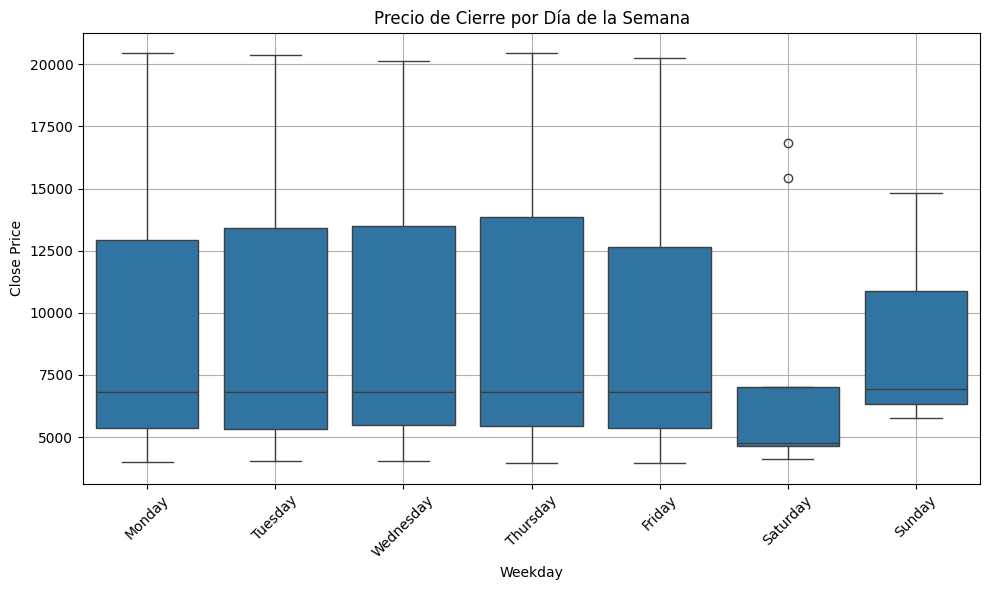

In [ ]:
import scipy.stats as stats

df = pd.read_csv("nestle.csv")

# Formato datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%B-%Y')

# Extraer día de la semana
df['Weekday'] = df['Date'].dt.day_name()

# Agrupar precios de cierre por día
grouped = df.groupby('Weekday')['Close Price'].apply(list)

# ANOVA
anova_result = stats.f_oneway(*grouped)
print("Estadístico F:", anova_result.statistic)
print("Valor p:", anova_result.pvalue)

# Pequeña visualización
plt.figure(figsize=(10,6))
sns.boxplot(x='Weekday', y='Close Price', data=df,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Precio de Cierre por Día de la Semana')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Se realizó un análisis ANOVA para evaluar si existen diferencias estadísticamente significativas en el precio de cierre de las acciones de Nestlé según el día de la semana.

Primero, se transformó la columna de fechas al formato adecuado (datetime) y se extrajo el día de la semana correspondiente para cada registro (lunes, martes, etc.). Esto permitió convertir una variable continua (fecha) en una variable categórica, necesaria para aplicar ANOVA.

Luego, se agruparon los precios de cierre (Close Price) por día de la semana y se aplicó el test ANOVA con el fin de comparar las medias entre los distintos grupos. Este enfoque se eligió porque ANOVA es una técnica estadística ideal para analizar si existen diferencias significativas entre más de dos grupos categóricos (en este caso, los días).

Finalmente, se generó un gráfico de cajas (boxplot) para visualizar la distribución y posible variación de precios entre los días.

## **Conclusiones**

### Conclusión general

  Hicimos un EDA de las acciones de Nestlé, y esto permitió comprender a fondo la estructura y comportamiento del dataset. La base es mayormente numérica y se encuentra casi completa, con pocos valores nulos localizados en dos columnas. A través de estadísticas descriptivas y visualizaciones como histogramas y boxplots, se identificó algo de estabilidad en los precios de apertura, cierre, máximos y mínimos, mientras que la "Deliverable Quantity" tuvo mayor variabilidad.

  Los modelos de regresión lineal y logística mostraron una relación entre el precio de apertura y variables como el precio más alto. Descubrimos que esto sirve de clasificación de precios en categorías altas y bajas. Para esto, el análisis ANOVA indicó que los precios de cierre no presentan diferencias significativas entre días de la semana, lo cual sugiere un comportamiento estable en ese aspecto.

### Conclusiones individuales

**Leonardo Antonio Espinosa // A01710961**

- Esta actividad me ayudó a conectar muchas piezas que habíamos visto a lo largo del curso. Desde el análisis de los datos y su preparación, hasta la creación de modelos para predecir resultados, todo el proceso me permitió entender mejor cómo aplicar la estadística y la programación a problemas reales.
Lo que más me gustó fue ver cómo cada paso tiene su importancia, es decir, limpiar bien los datos, elegir las variables correctas, probar distintos modelos y, sobre todo, interpretar bien los resultados. No se trata solo de que el modelo funcione, sino de entender por qué funciona y qué decisiones podemos tomar con base en eso.



**Adrián Rodríguez González // A01710823**
- Como estudiante de finanzas, esta actividad en lo personal me ayudó a aterrizar de mejor manera varios conceptos tanto estadísticos, como de mi carrera, ya que en finanzas también tendemos a analizar stocks y sus comportamientos. Asimismo me dejó muy en claro la gran importancia que hay en la preparación de los datos, selección de variables, limpieza y conversión de los mismos, para poder realizar un correcto análisis de la base de datos. Siguiendo con los aspectos estadísticos de la actividad, me dejó más en claro que cada medida de tendencia central te da información sumamente valiosa que en este caso nos ayuda a saber como se han desenvuelto diariamente los precios de los stocks, ya sea sus altas, sus bajas, etc.; también nos ayudan a comprender el comportamiento de la compra-venta de las mismas y el número de acciones en el mercado. Otra parte muy interesante de la actividad es la parte de correlaciones y regresiones lineales, en lo personal la que más fue de mi agrado, esto debido a que me resulta sumamente interesante entender como unas variables tienen cierto impacto unas con otras, y cómo unas variables se mueven a la par de otras, esto dando como resultado modelos que en nuestro caso fueron muy precisos ya que su R2 era muy cercana a 1, por lo que nuestras predicciones de los modelos ajustados eran bastante apegadas a la realidad. Finalmente, la ANOVA es de igual manera impresionante ya que nos da un panorama bastante amplio de la volatilidad que existe con respecto a los precios al cierre de las acciones de Nestlé, que como se observa no existe una volatilidad muy alta ya que los precios generalmente se mantienen en el mismo rango, a excepción de ciertos valores irregulares.


**Andrea Cristina Ramírez Parra // A01749899**

- "Gracias a un análisis exhaustivo sobre las acciones de Nestlé, me ayudó a aplicar lo visto en clase y generar una interpretación sobre el comportamiento de las variables. Por ejemplo, para el análisis inicial, comprender la estructura del dataset y sus variables facilitó la realización de un análisis cuantitativo, visualizaciones y modelización de regresión. El dataset se encontró bastante completo, lo que permitió una exploración más sencilla de las relaciones entre las variables, destacando las altas correlaciones entre los precios, la estabilidad en los precios de cierre a lo largo de la semana y la coherencia de su comportamiento con el mercado de valores."


**Jorge Emiliano Pomar // A01709338**

- La elaboración de este EDA me permitió identificar el valor que tiene cada uno de los conceptos vistos en la clase de estadística. Desde lo más general que vimos en la clase como la identificación de las variables y el tipo de datos que hay en el dataset hasta cosas más enfocadas en modelos predictivos. Creo que llegamos a encontrar relaciones interesantes entre los costos de apertura y las variables que afectan como las acciones negociadas y las transacciones. Después logramos identificar distribuciones en los gráficos como boxplots e histogramas que nos llevaron a las regresiones. Estas regresiones que nos proporcionaron modelos predictivos que apuntaban hacia la predicción en los costos para tomar decisiones. En general, este EDA ayudó a que se integraran todos los conceptos vistos en clase en un trabajo que tuviera coherencia para la solución de una problemática y que en lo personal me ayudó a comprender la relación entre los datos que un buen dataset debe tener para poder sacar ideas de inteligencia estadística.


